In [1]:
import numpy as np
from math import atan2, pi, cos, inf, sin
from colorsys import hsv_to_rgb
import matplotlib.pyplot as plt

In [2]:
# Import csv
with open('coords_2021.csv', 'r', encoding='utf-8-sig') as f: 
    light_coords = np.genfromtxt(f, dtype=float, delimiter=',')

print(light_coords.shape, "\n")
print(light_coords)

(500, 3) 

[[ 0.54716981 -0.17358491  0.69811321]
 [ 0.54716981 -0.17358491  0.69811321]
 [ 0.54716981 -0.17358491  0.69811321]
 ...
 [ 0.2        -0.12075472  2.26792453]
 [ 0.43396226 -0.27169811  2.33584906]
 [ 0.43396226 -0.27169811  2.33584906]]


In [3]:
# Calculate rgb from coords ([X, Y, Z]) and rotation (radians)
def coords_to_rgb(coords, rotation = 0, max_height = inf):
    # Check if Z coord is greater than the height
    if (coords[2] > max_height):
        return np.array([0, 0, 0])
    # Calculate anlge from x and y
    angle = atan2(coords[1], coords[0]) + rotation
    # If angle is negative, subtract from 2pi
    if(angle < 0):
        angle = (2*pi) - abs(angle)
    # Normalize angle to have hue from 0 to 1
    hue = angle / (2*pi)
    # Convert hue to rgb values
    rgb = hsv_to_rgb(hue, 1, 1)
    # Return rgb on scale of 255, rounded to nearest int
    return np.rint(np.array(rgb)*255).astype(int)

In [4]:
rgb_map = np.apply_along_axis(coords_to_rgb, 1, light_coords)
print(rgb_map)

[[255   0  75]
 [255   0  75]
 [255   0  75]
 ...
 [255   0 132]
 [255   0 136]
 [255   0 136]]


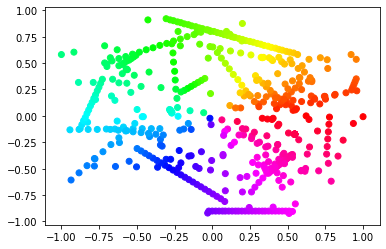

In [5]:
# Top down view at timestep 0 in rotation
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(light_coords[:,0], light_coords[:,1], c = rgb_map/255)
plt.show()

In [6]:
# Caclulate rgb rotations of lights
time = 0
rainbow_maps = []
# Animate for three complete rotations of tree
while(time < 6*pi):
    rotation = time
    # Animate lights from bottom to top, then top bottom
    if time < 2*pi:
        max_height = 2*sin(time-(pi/2))+2
    elif time < 4*pi:
        max_height = 2*cos(time)+2
    else:
        max_height = inf
    rainbow_maps.append(np.apply_along_axis(coords_to_rgb, 1, light_coords, rotation, max_height))
    time += pi/240

In [7]:
# Define rgb headers of file
rgb_header = []
for i in range(500):
    rgb_header.append("R_" + str(i))
    rgb_header.append("G_" + str(i))
    rgb_header.append("B_" + str(i))

# Define funtion to write the rgb maps to a csv file as per:
# https://raw.githubusercontent.com/standupmaths/xmastree2021/main/examples/bouncy-ball.csv
def write_csv(rgb_maps):
    import csv
    with open('rainbow_rotation.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(["FRAME_ID:"] + rgb_header)
        for i, rgb_values in enumerate(rgb_maps):
            writer.writerow([i] + rgb_values.flatten().tolist())

In [8]:
# Write csv to file
write_csv(rainbow_maps)